# 0. Overview

We will be analyzing an extract of 1994 U.S. Census data. See more on the data set [here](https://archive.ics.uci.edu/ml/datasets/census+income). First, we are going to need some help from some well-known, third-party libraries:

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

Third-party libraries are libraries (collections of code) that do not come with the core Python distribution. You can get these libraries through downloading the Anaconda distribution, which includes them all, or through installing them manually with `pip` (or `pip3`, depending on your system), which is the Python package manager.

When importing a Python library, you can give it an alias, which is usually done to make something easier to type. It's good to follow standard protocol for a given library when doing this so that other people will recognize it throughout your code. 

`numpy` (typically abbreviated as `np`) provides the following:
- a homogenous (read: for a single data type) array with very useful manipulation methods
- a number of useful advanced math functions
- other data type helpers
- more generally, `numpy` is a collection of Python wrappers for very well-optimized _C_ and _FORTRAN_ math code

`pandas` (typically abbreviated as `pd`) is:
- a library that provides, amongst other things, a very nice data structure known as the `DataFrame`
- the `DataFrame` is a relational / tabular data structure
- i.e. it allows you to do SQL-ish anlysis in Python
- it also visualizes nicely in Jupyter notebooks
- a good bit of Pandas is actually just user-friendly interfaces on top of `numpy`

`matplotlib` (from which the `pyplot` submodule is typically imported and aliased as `plt`)
- the old faithful data visualization library for Python
- it definitely provides a steep learning curve
- but it's a powerful tool once learned

`sklearn`
- the de-facto Python machine learning library
- provides fundamental predictive modeling frameworks like _linear regression_
- as well as more machine- learning-ish frameworks like that of the _random forest_
- in addition, it provides a lot of model evaluation functionality
- it doesn't really get into _deep learning_

In [2]:
%matplotlib inline

The above is a _magic_ Jupyter command that ensures all `matplotlib` plots will by default show in the notebook.

# 1. Get Data

### Retrieve and quick look

In [3]:
data = pd.read_csv("census_data.csv", header=None)

In [4]:
data.shape

(32561, 15)

In [5]:
data.iloc[:5, :8]

,0,1,2,3,4,5,6,7
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife


In [6]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 
        'education_num', 'marital_status', 'occupation',
        'relationship', 'race', 'sex', 'capital_gain',
        'capital_loss', 'hours_per_week', 'native_country', 
        'over_fifty_k']

In [7]:
data.columns = cols

In [8]:
data.iloc[:5, :8]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife


In [9]:
data.iloc[-5:, -7:]

,race,sex,capital_gain,capital_loss,hours_per_week,native_country,over_fifty_k
32556,White,Female,0,0,38,United-States,<=50K
32557,White,Male,0,0,40,United-States,>50K
32558,White,Female,0,0,40,United-States,<=50K
32559,White,Male,0,0,20,United-States,<=50K
32560,White,Female,15024,0,40,United-States,>50K


### Cleanliness check

In [10]:
data.duplicated().sum()

24

In [11]:
data[data.duplicated()].index

Int64Index([ 4881,  5104,  9171, 11631, 13084, 15059, 17040, 18555, 18698,
            21318, 21490, 21875, 22300, 22367, 22494, 25872, 26313, 28230,
            28522, 28846, 29157, 30845, 31993, 32404],
           dtype='int64')

In [12]:
data = data.drop_duplicates()

In [13]:
data.duplicated().sum()

0

In [14]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
over_fifty_k      0
dtype: int64

# 2. Exploratory Data Analysis

In [36]:
data.dtypes.value_counts()

object    9
int64     6
bool      1
dtype: int64

In [15]:
data.education.nunique()

16

In [16]:
data.education.value_counts()

 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: education, dtype: int64

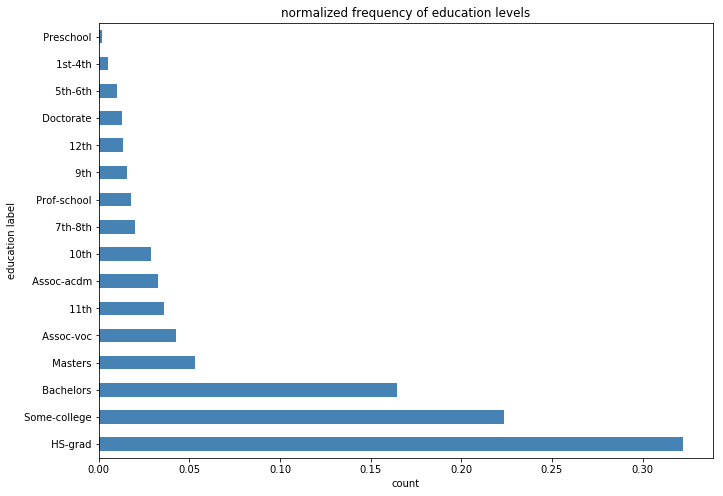

In [23]:
ax = data.education.value_counts(normalize=True).plot.barh(figsize=(11, 8), color="steelblue")
xlab = ax.set_xlabel("count")
ylab = ax.set_ylabel("education label")
t = ax.set_title("normalized frequency of education levels")

### Problem

Pick another column to run `value_counts` on. Plot the results as a **vertical** bar plot. Do you see anything interesting?

In [24]:
data.over_fifty_k.value_counts(normalize=True)

 <=50K    0.759074
 >50K     0.240926
Name: over_fifty_k, dtype: float64

In [31]:
data.over_fifty_k.unique()

array([' <=50K', ' >50K'], dtype=object)

In [32]:
def is_over_fifty_k(income):
    return income.strip() == ">50K"

In [33]:
data["over_fifty_k_bool"] = data.over_fifty_k.apply(is_over_fifty_k)

In [34]:
data.over_fifty_k_bool.head()

0    False
1    False
2    False
3    False
4    False
Name: over_fifty_k_bool, dtype: bool

In [35]:
data.over_fifty_k_bool.value_counts(normalize=True)

False    0.759074
True     0.240926
Name: over_fifty_k_bool, dtype: float64

In [37]:
data.capital_gain.describe()

count    32537.000000
mean      1078.443741
std       7387.957424
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_gain, dtype: float64

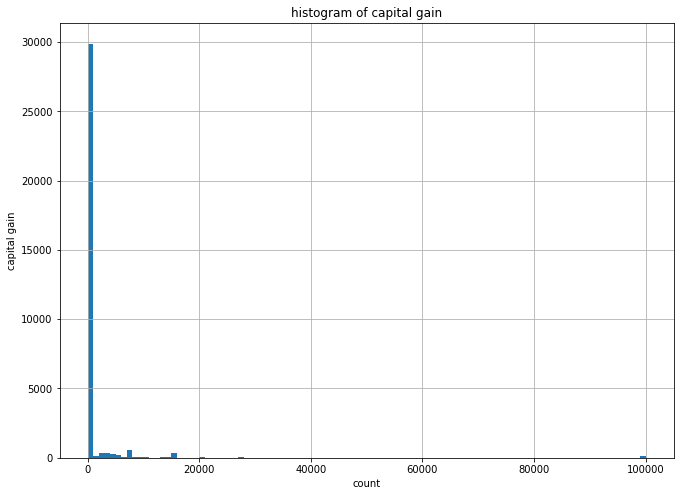

In [45]:
ax = data.capital_gain.hist(figsize=(11, 8), bins=100)
xlab = ax.set_xlabel("count")
ylab = ax.set_ylabel("capital gain")
t = ax.set_title("histogram of capital gain")

In [41]:
capital_gains_filtered = data.loc[data.capital_gain > 0, "capital_gain"]

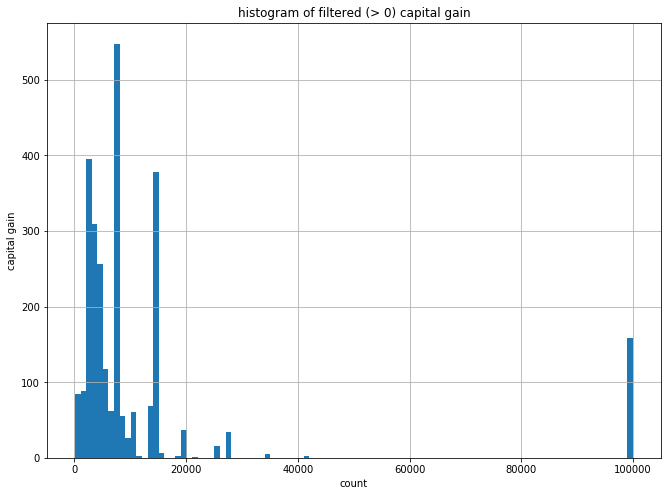

In [44]:
ax = capital_gains_filtered.hist(figsize=(11, 8), bins=100)
xlab = ax.set_xlabel("count")
ylab = ax.set_ylabel("capital gain")
t = ax.set_title("histogram of filtered (> 0) capital gain")

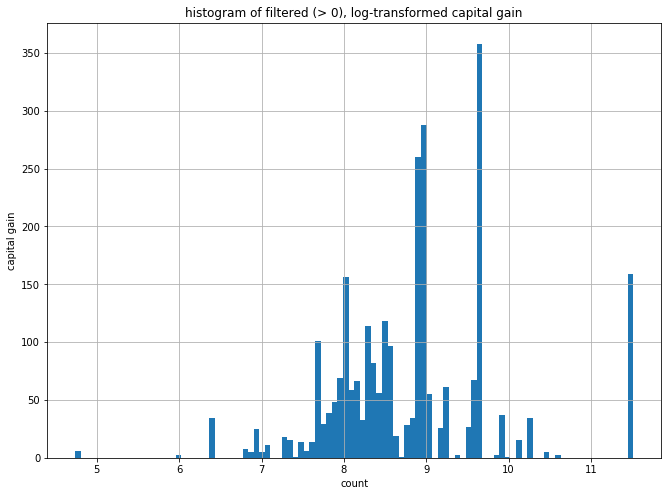

In [48]:
ax = capital_gains_filtered.apply(np.log).hist(figsize=(11, 8), bins=100)
xlab = ax.set_xlabel("count")
ylab = ax.set_ylabel("capital gain")
t = ax.set_title("histogram of filtered (> 0), log-transformed capital gain")

In [50]:
data.capital_gain.quantile([.8, .9, .95, .99])

0.80        0.0
0.90        0.0
0.95     5013.0
0.99    15024.0
Name: capital_gain, dtype: float64

### Problem

Perform a similar analysis to what we did for `capital_gain` on `capital_loss`.

In [65]:
cap_gain_missing = data.capital_gain

In [66]:
cap_gain_missing = cap_gain_missing.apply(lambda x: np.nan if x == 0 else x)

In [67]:
cap_gain_missing.isnull().sum()

29825

In [69]:
cap_gain_missing = cap_gain_missing.fillna(0)

In [70]:
cap_gain_missing.isnull().sum()

0

In [ ]:
data.fillna()

In [54]:
data[["education", "over_fifty_k_bool"]
    ].groupby(["over_fifty_k_bool", "education"]
    ).size(
    ).rename("cnt"
    ).to_frame()

cnt
over_fifty_k_bool education          
False              10th           871
                   11th          1115
                   12th           400
                   1st-4th        160
                   5th-6th        316
                   7th-8th        605
                   9th            487
                   Assoc-acdm     802
                   Assoc-voc     1021
                   Bachelors     3132
                   Doctorate      107
                   HS-grad       8820
                   Masters        763
                   Preschool       50
                   Prof-school    153
                   Some-college  5896
True               10th            62
                   11th            60
                   12th            33
                   1st-4th          6
                   5th-6th         16
                   7th-8th         40
                   9th             27
                   Assoc-acdm     265
                   Assoc-voc      361
                   Bachelors     2221
                   Doctorate      306
                   HS-grad       1674
                   Masters        959
                   Prof-school    423
                   Some-college  1386

In [55]:
income_ed_grouped = data[["education", "over_fifty_k_bool"]
                         ].groupby(["over_fifty_k_bool", "education"]
                         ).size(
                         ).rename("cnt"
                         ).to_frame()

In [56]:
income_ed_grouped["ratio"] = income_ed_grouped / len(data)

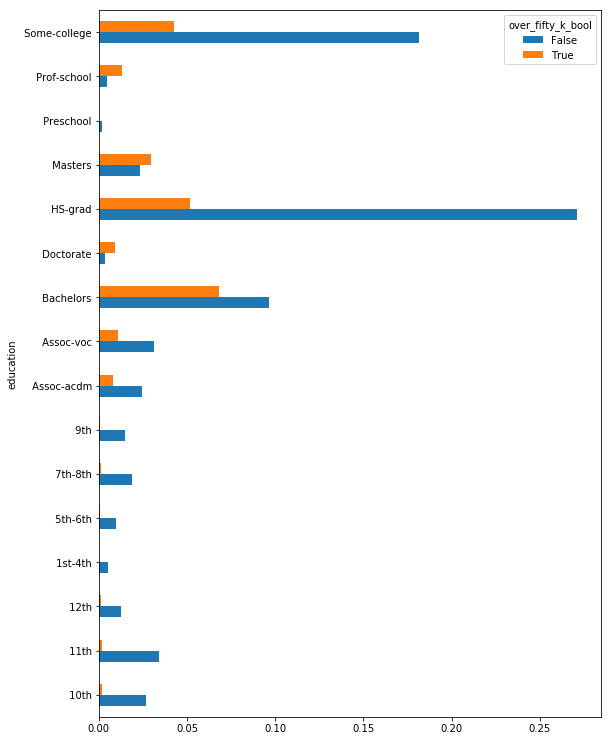

In [64]:
income_ed_grouped.ratio.unstack(0).plot.barh(figsize=(9, 13))

# 3. Modeling

In [71]:
X_cols = ['age', 'workclass', 'fnlwgt', 'education', 
          'education_num', 'marital_status', 'occupation',
          'relationship', 'race', 'sex', 'capital_gain',
          'capital_loss', 'hours_per_week', 'native_country']

In [86]:
data[X_cols].dtypes.sort_values()

age                int64
fnlwgt             int64
education_num      int64
capital_gain       int64
capital_loss       int64
hours_per_week     int64
workclass         object
education         object
marital_status    object
occupation        object
relationship      object
race              object
sex               object
native_country    object
dtype: object

In [87]:
obj_srs = data.select_dtypes(include=object)

In [88]:
one_hot = pd.get_dummies(obj_srs)

In [89]:
X = data.select_dtypes(include=int).join(one_hot_hot, how="inner")

In [91]:
y = data.over_fifty_k_bool

In [92]:
y_train, y_test = train_test_split(y, test_size=.2, stratify=y)

In [93]:
tree = DecisionTreeClassifier()

In [95]:
tree = tree.fit(X.loc[y_train.index], y_train)

In [97]:
y_pred = tree.predict(X.loc[y_test.index])

In [100]:
y_pred[:5]

array([False, False, False, False, False])

In [114]:
y_test_df = y_test.rename("y_actual").to_frame()

In [115]:
y_test_df["y_pred"] = y_pred

In [116]:
y_test_df.head()

,y_actual,y_pred
14067,False,False
6845,False,False
1543,False,False
25587,False,False
31099,False,False


In [118]:
(y_test_df.y_actual == y_test_df.y_pred).sum() / len(y_test_df)

1.0

In [ ]:
importances

In [119]:
tree.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1.])

In [123]:
tree.tree_()

TypeError: 'sklearn.tree._tree.Tree' object is not callable